In [18]:
# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display the first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [19]:
# Import libraries for web scraping
import requests
from bs4 import BeautifulSoup

# Scrape Tesla revenue data from Macrotrends
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")

# Find revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in soup_tesla.find_all("table"):
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
        break

# Convert data types
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Display last 5 rows
tesla_revenue.tail()


,Date,Revenue


In [20]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display the first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [21]:
# Scrape GME revenue data from Macrotrends
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")

# Find revenue table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in soup_gme.find_all("table"):
    if "GameStop Quarterly Revenue" in str(table):
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
        break

# Convert data types
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Display last 5 rows
gme_revenue.tail()


,Date,Revenue


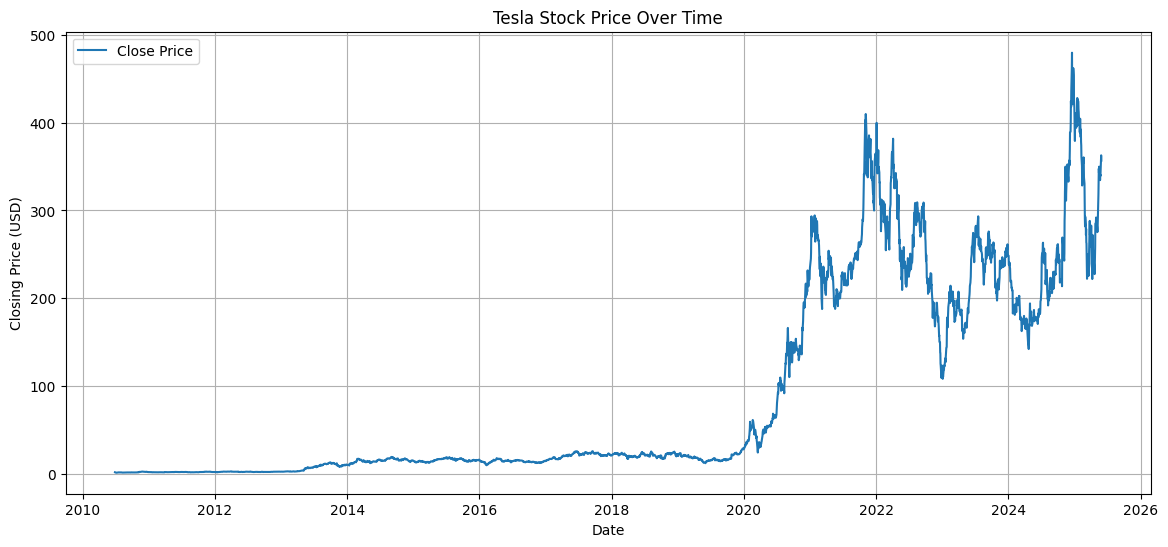

In [23]:
# Define function to make a line plot of stock data
def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()
# Plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


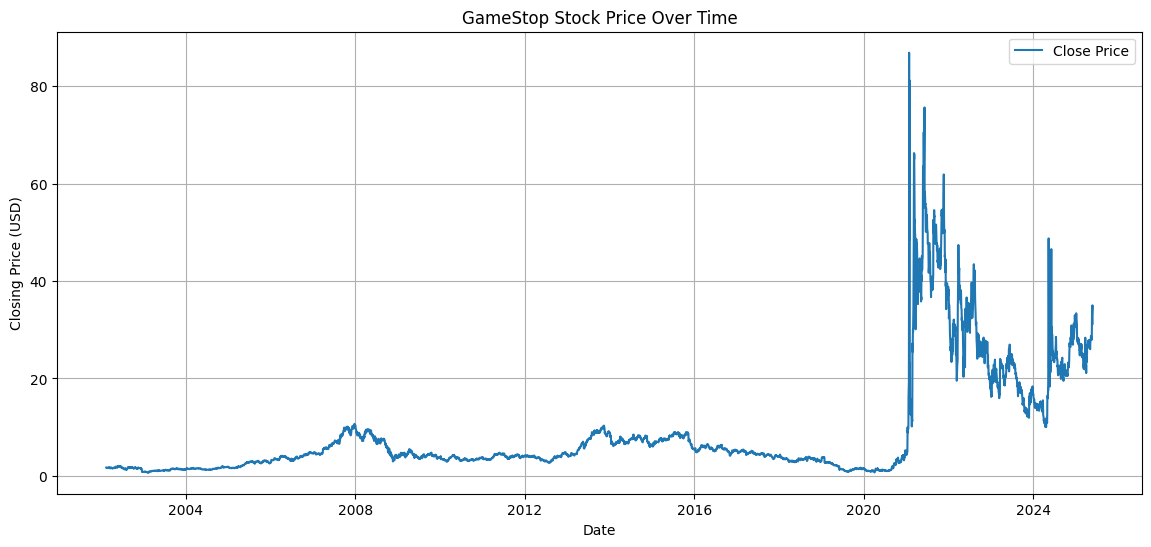

In [24]:
# Plot GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")


In [17]:
!pip install matplot

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 161.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 145.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.0/739.0 kB 46.4 MB/s eta 0:00:00
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9710 sha256=00611919b70dd32a9a3f5d65f4a28352da09f5d0169820b17bd25efa5570cb5d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/81/fd/d8/f145b47bedceb5dff96b76e404a4ee9be956a4f8f150cd8133
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26365 sha256=c4292ad0f176cbe02e80